# Drawing on Images

- lines
- rectangles
- circles
- polygons
- text

---
### Imports and Helper-functions

In [1]:
import os
import random

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def imshow(img, title=None, size=10, axis=False, color_space="BGR"):
    aspect_ratio = img.shape[0] / img.shape[1]
    plt.figure(figsize=(size * aspect_ratio, size))
    if color_space.lower() == "bgr":
        rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    elif color_space.lower() == "rgb":
        rgb_img = img
    else:
        rgb_img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img)
    if type(title) == str:
        plt.title(title)
    if axis ==False:
        plt.axis('off')
    plt.show()

In [3]:
def get_random_img_path(search_path='../../res/img'):
    """
    This function searches for common image files in all subdirectories
    and return a random image path of them.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.ico']
    image_paths = []

    # Walk through all subdirectories
    for root, dirs, files in os.walk(search_path):
        for file_name in files:
            # Check if the file is an image
            if any(file_name.lower().endswith(ext) for ext in image_extensions):
                # Get the full file path
                full_path = os.path.join(root, file_name).replace("\\", "/")
                image_paths.append(full_path)

    return random.choice(image_paths)

# test
get_random_img_path()    

'../../res/img/flickr30k_images/flickr30k_images/flickr30k_images/4540165999.jpg'

---
### Loading data

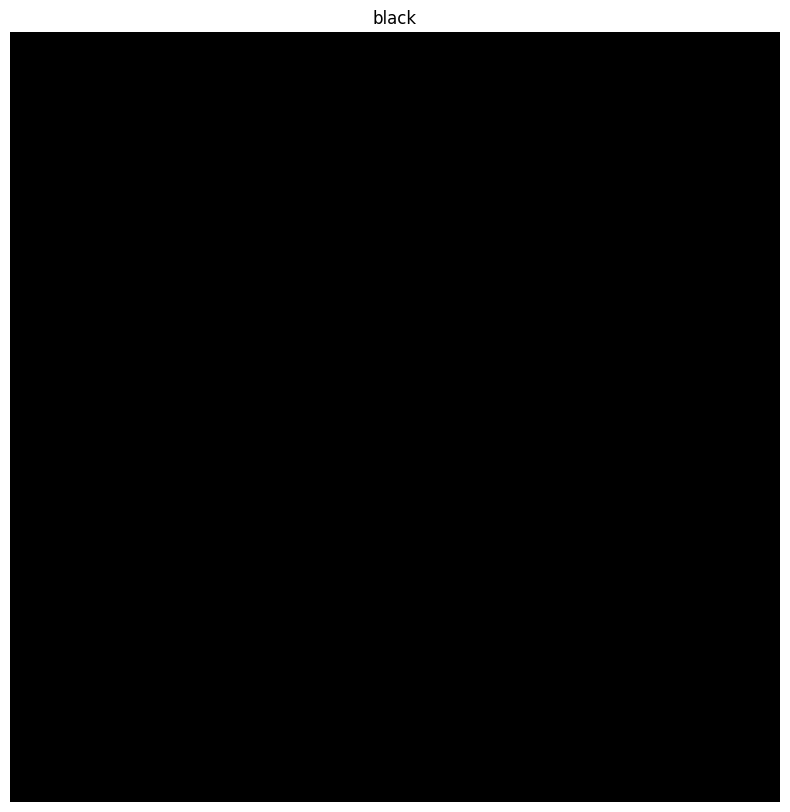

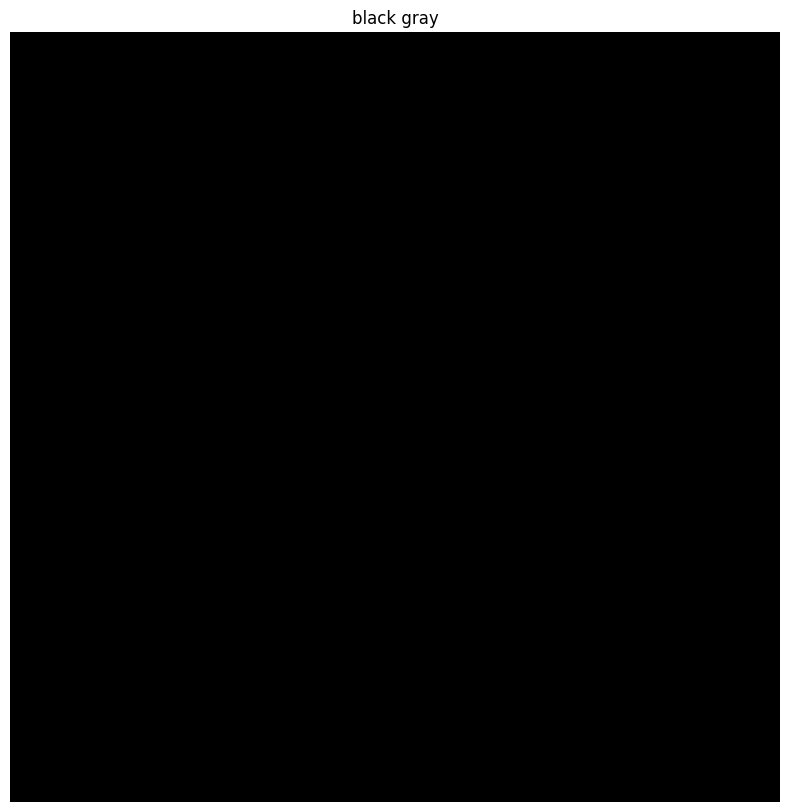

In [29]:
black_img = np.full((512, 512, 3), 0, np.uint8)

black_img_gray = np.full((512, 512), 0, np.uint8)

imshow(black_img, "black")
imshow(black_img_gray, "black gray")

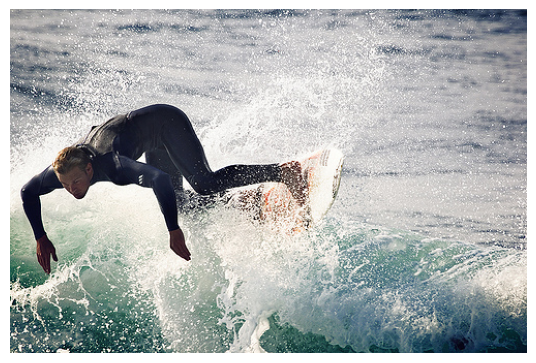

'../../res/img/flickr30k_images/flickr30k_images/3084380974.jpg'

In [119]:
IMG_PATH = get_random_img_path()
img = cv2.imread(IMG_PATH)
imshow(img)
IMG_PATH

---
### Draw a line

```python
cv2.line(image np array, start coordinates, ending coordinates, color, thickness)
```

Sideeffect: It works inplace!

In [32]:
black_img.shape

(512, 512, 3)

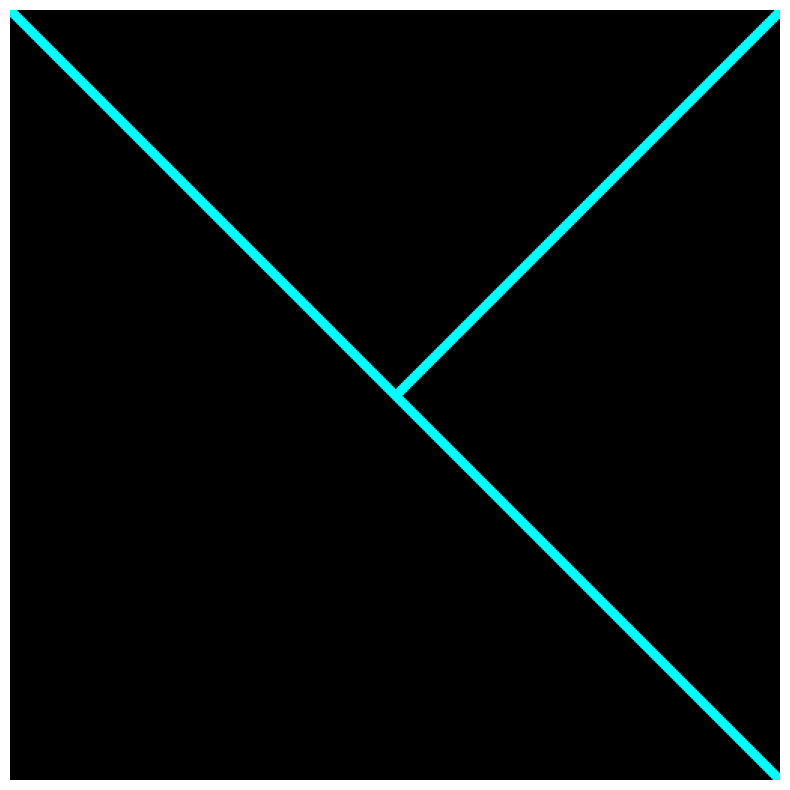

In [34]:
cv2.line(black_img, (0, 0), (512, 512), (255, 255, 0), 5)
cv2.line(black_img, (black_img.shape[0]//2, black_img.shape[1]//2), (512, 0), (255, 255, 0), 3)

imshow(black_img)

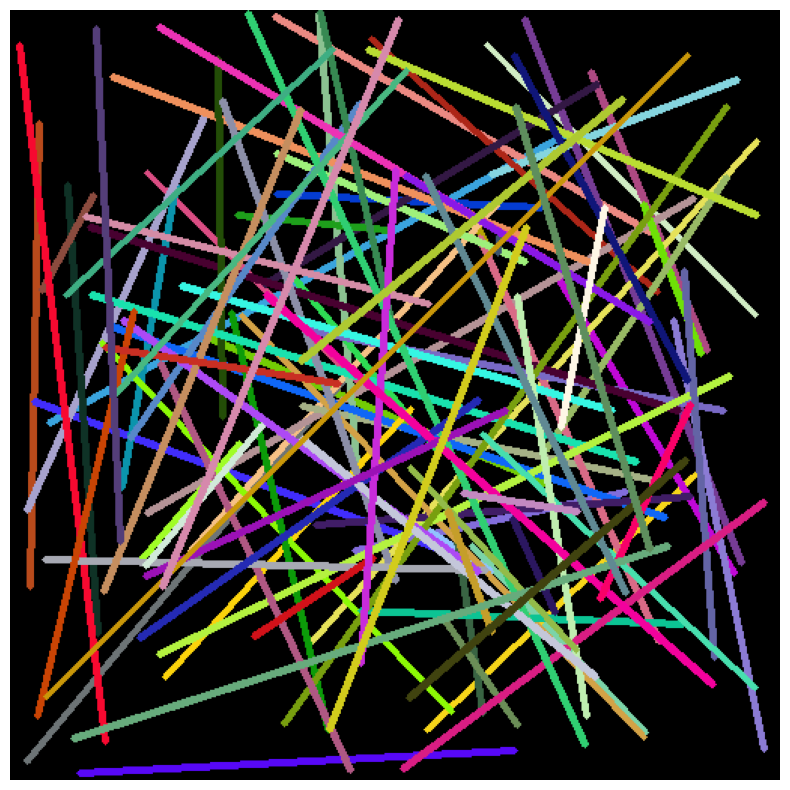

In [37]:
black_img = np.full((512, 512, 3), 0, np.uint8)

for i in range(100):
    start_x = np.random.randint(black_img.shape[0])
    start_y = np.random.randint(black_img.shape[1])
    end_x = np.random.randint(black_img.shape[0])
    end_y = np.random.randint(black_img.shape[1])

    cv2.line(black_img, (start_x, start_y), (end_x, end_y), (np.random.randint(255), np.random.randint(255), np.random.randint(255)), 3)

imshow(black_img)

---
### Drawing Rectangles

```python
cv2.rectangle(image np array, top-left coordinates, bottom-right coordinates, color, thickness)
```

If thickness is negative = filled

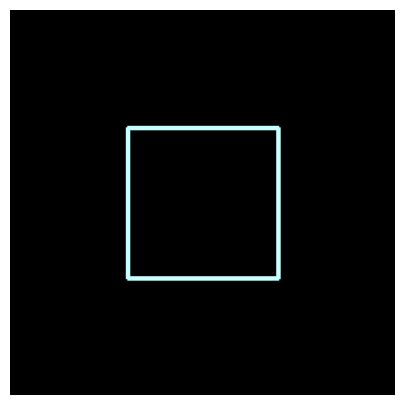

In [43]:
black_img = np.full((256, 256, 3), 0, np.uint8)

cv2.rectangle(black_img, (black_img.shape[0]//2-50, black_img.shape[1]//2-50), (black_img.shape[0]//2+50, black_img.shape[1]//2+50),
                (255, 255, 200), 2)

imshow(black_img, size=5)

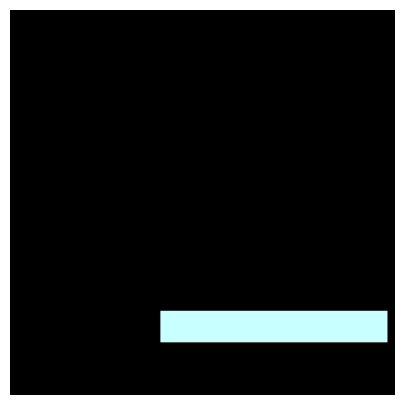

In [45]:
black_img = np.full((256, 256, 3), 0, np.uint8)

cv2.rectangle(black_img, (100, 200), (250, 220),
                (255, 255, 200), -1)

imshow(black_img, size=5)

---
### Drawing Circles

```python
cv2.circle(image np array, center coordinates, radius, color, thikness)
```

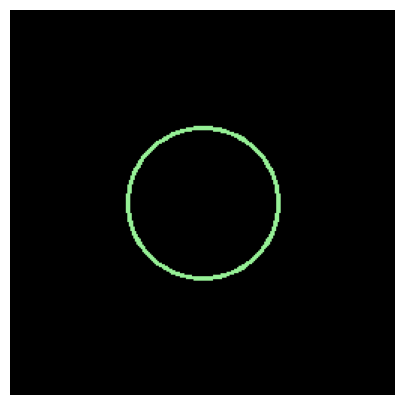

In [56]:
black_img = np.full((256, 256, 3), 0, np.uint8)

cv2.circle(black_img, (black_img.shape[0]//2, black_img.shape[1]//2), 50, (150, 240, 150), 2)

imshow(black_img, size=5)

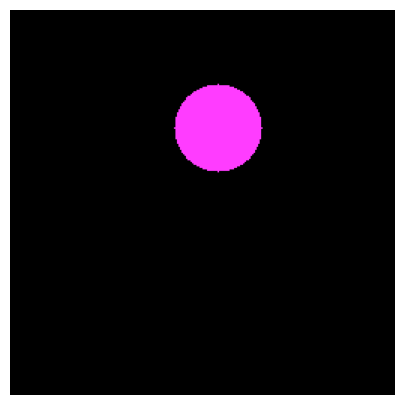

In [51]:
black_img = np.full((256, 256, 3), 0, np.uint8)

cv2.circle(black_img, (black_img.shape[0]//2+10, black_img.shape[1]//2-50), 29, (255, 60, 255), -1)

imshow(black_img, size=5)

---
### Drawing Polygons

```python
cv2.polylines(image np array, points, closed?, color, thikness)
```

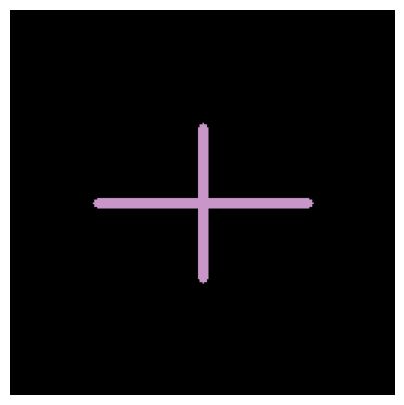

In [72]:
black_img = np.full((256, 256, 3), 0, np.uint8)

points = np.array([ [black_img.shape[0]//2, black_img.shape[1]//2-50],
                    [black_img.shape[0]//2, black_img.shape[1]//2+50],
                    [black_img.shape[0]//2, black_img.shape[1]//2],
                    [black_img.shape[0]//2-70, black_img.shape[1]//2],
                    [black_img.shape[0]//2+70, black_img.shape[1]//2]
                ], np.int32)
# points = points.reshape((-1, 1, 2))

cv2.polylines(black_img, [points], False, (200, 150, 200), 5)

imshow(black_img, size=5)

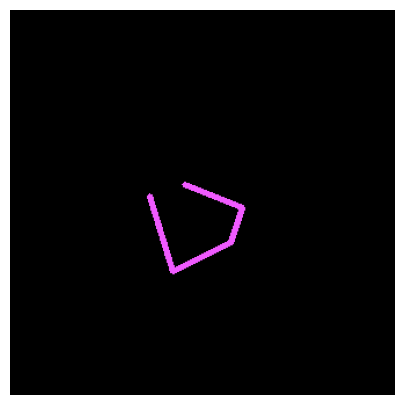

In [79]:
black_img = np.full((332, 332, 3), 0, np.uint8)

points = np.array([ [150, 150],
                    [200, 170],
                    [190, 200],
                    [140, 225],
                    [120, 160]
                ], np.int32)

cv2.polylines(black_img, [points], False, (255, 90, 240), 3)

imshow(black_img, size=5)

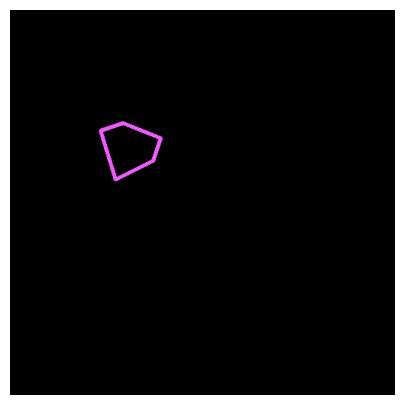

In [78]:
black_img = np.full((512, 512, 3), 0, np.uint8)

points = np.array([ [150, 150],
                    [200, 170],
                    [190, 200],
                    [140, 225],
                    [120, 160]
                ], np.int32)

cv2.polylines(black_img, [points], True, (255, 90, 240), 3)

imshow(black_img, size=5)

---
### Drawing Text

```python
cv2.putText(image np array, text, bottom-left coordinate, Font, size, color, thikness)
```


Available Text-Fonts:
```python
cv2.FONT_HERSHEY_SIMPLEX  # normal size sans-serif font
cv2.FONT_HERSHEY_PLAIN    # small size sans-serif font
cv2.FONT_HERSHEY_DUPLEX   # normal size sans-serif font (more complex than FONT_HERSHEY_SIMPLEX)
cv2.FONT_HERSHEY_COMPLEX  # normal size serif font
cv2.FONT_HERSHEY_TRIPLEX  # normal size serif font (more complex than FONT_HERSHEY_COMPLEX)

```

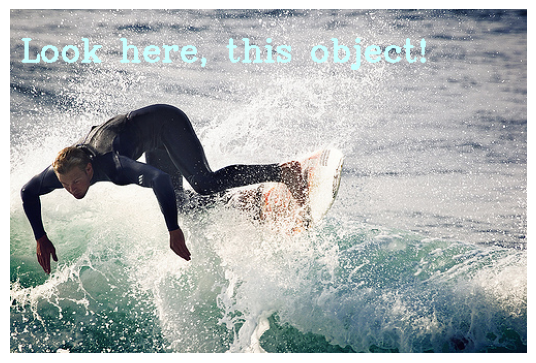

In [129]:
img = cv2.imread(IMG_PATH)

cv2.putText(img, "Look here, this object!", (10, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 200), 2)

imshow(img, size=10)

---